<a href="https://colab.research.google.com/github/adityadj98/Generasi-Gigih-2-Boot-Camp/blob/main/GenGigih2_Homicide_Suicide_rate_and_GDP_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import math
import warnings
warnings.filterwarnings("ignore")

In [2]:
import gdown

meta_url = 'https://drive.google.com/uc?id='
url = meta_url + '1hA9lXNxkScsP380CDAFMx0keFGOUHatc'
output = 'suicide homicide gdp.csv'

gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1hA9lXNxkScsP380CDAFMx0keFGOUHatc
To: /content/suicide homicide gdp.csv
100%|██████████| 1.29M/1.29M [00:00<00:00, 6.23MB/s]


'suicide homicide gdp.csv'

In [3]:
train_df = pd.read_csv("/content/suicide homicide gdp.csv")

In [4]:
train_df.head()

,country,iso3c,iso2c,year,"Intentional homicides (per 100,000 people)","Suicide mortality rate (per 100,000 population)",GDP (current US$),"GDP per capita, PPP (current international $)",adminregion,incomeLevel
0,Afghanistan,AFG,AF,1970,NaN,NaN,1.748887e+09,NaN,South Asia,Low income
1,Afghanistan,AFG,AF,1971,NaN,NaN,1.831109e+09,NaN,South Asia,Low income
2,Afghanistan,AFG,AF,1972,NaN,NaN,1.595555e+09,NaN,South Asia,Low income
3,Afghanistan,AFG,AF,1973,NaN,NaN,1.733333e+09,NaN,South Asia,Low income
4,Afghanistan,AFG,AF,1974,NaN,NaN,2.155555e+09,NaN,South Asia,Low income


In [5]:
print("Data shape:",train_df.shape)
object_data = list(train_df.select_dtypes(include= 'object').columns)
num_data = list(train_df.select_dtypes(exclude= 'object').columns)
print('Total categorical:', len(object_data))
print('Total numerical:', len(num_data),'\n')

if object_data:
  many_unique = [x for x in object_data if (train_df[x].nunique() > 7 or train_df[x].nunique()==1)]
  print(f'Categorical with >{7} or 1 unique:', len(many_unique), '\n')
  print(train_df[many_unique].nunique().sort_values(),'\n')

few_unique = [x for x in num_data if train_df[x].nunique() < 15]
print(f'Numerical with <{15} unique:', len(few_unique), '\n')
print(train_df[few_unique].nunique().sort_values())

Data shape: (13566, 10)
Total categorical: 5
Total numerical: 5 

Categorical with >7 or 1 unique: 3 

iso2c      263
iso3c      264
country    266
dtype: int64 

Numerical with <15 unique: 0 

Series([], dtype: float64)


In [6]:
null = train_df.isnull().sum()
print(f"Missing columns total: {(null!=0).sum()}/{len(train_df.columns)}")
print("Missing columns name:", ', '.join([x for x in train_df.columns if train_df[x].isnull().any()]))

over_percentage = null[null > (25/100*train_df.shape[0])]
print(f"Null columns over {25}% train_df:", over_percentage.shape[0],'\n')
print(over_percentage.sort_values())

Missing columns total: 8/10
Missing columns name: iso3c, iso2c, Intentional homicides (per 100,000 people), Suicide mortality rate (per 100,000 population), GDP (current US$), GDP per capita, PPP (current international $), adminregion, incomeLevel
Null columns over 25% train_df: 4 

GDP per capita, PPP (current international $)      6328
adminregion                                        6579
Suicide mortality rate (per 100,000 population)    8946
Intentional homicides (per 100,000 people)         9726
dtype: int64


In [7]:
px.imshow(train_df.isnull()/1,  width=600, height=400,
                   title ="Missing Value")

Text(0.5, 1.05, 'Data Distribution')

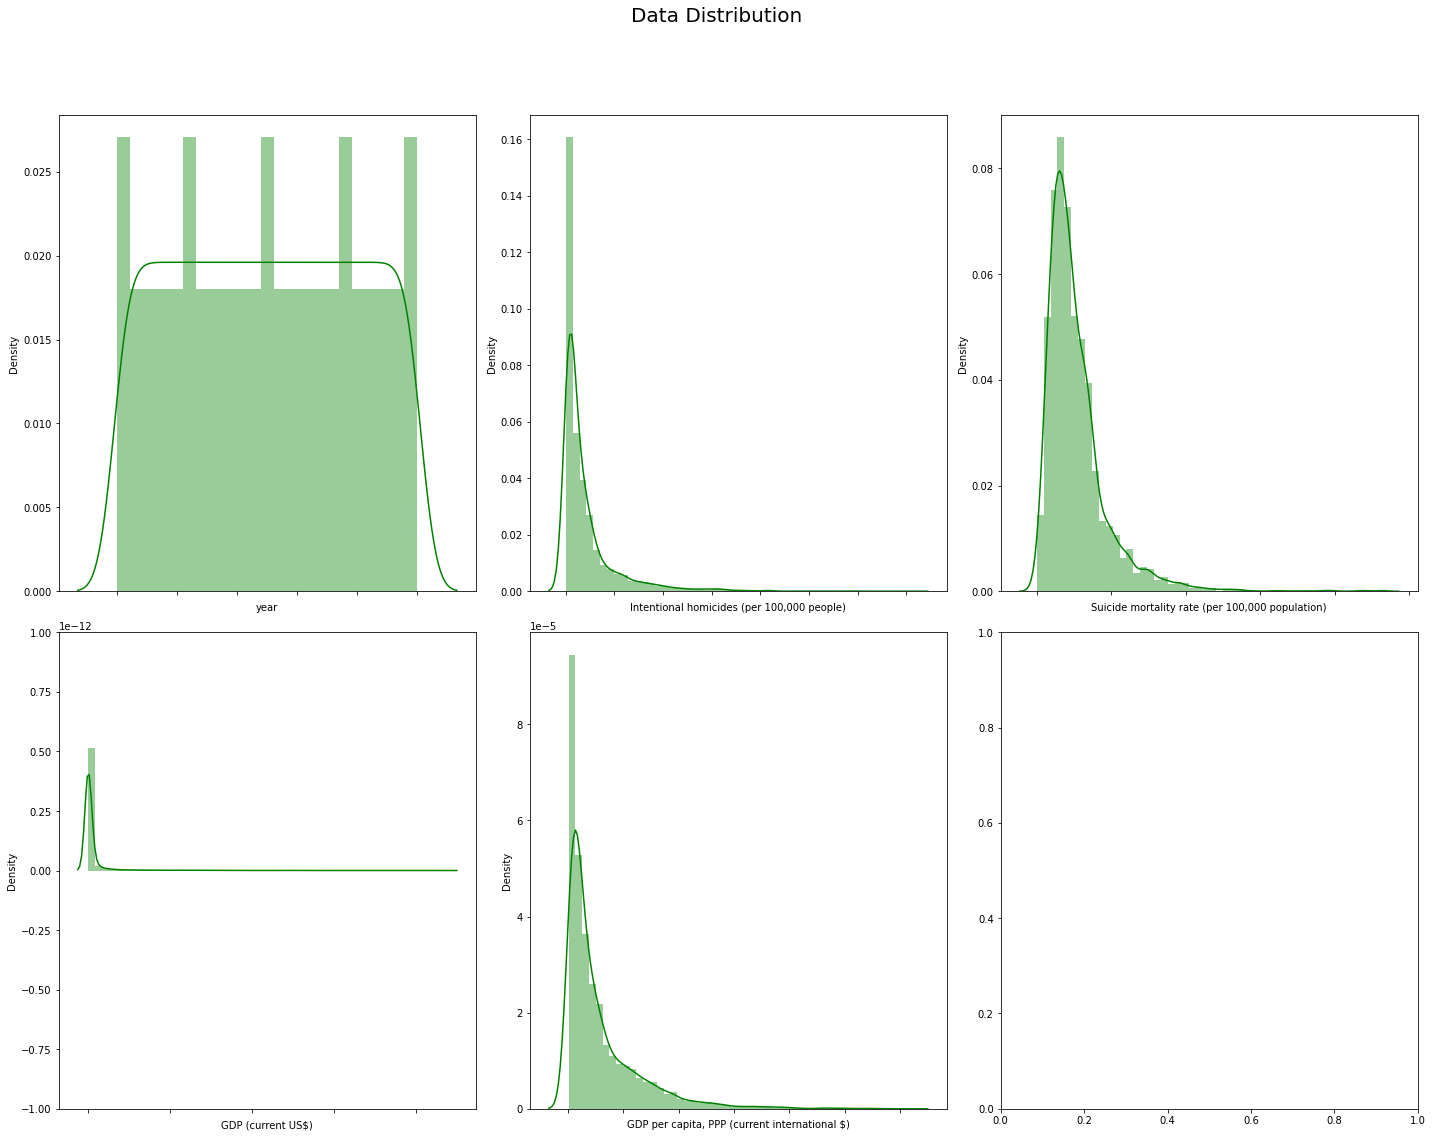

In [8]:
type_data = list(train_df.select_dtypes(include= 'number').columns)
plot = sns.distplot
fig , ax = plt.subplots(math.ceil(len(type_data)/3), 3, figsize=(20,len(type_data)*3))
idx=0
for row in ax:
  for column in row:
    plot(train_df[type_data[idx]], ax=column, color="g")
    xlabels = column.get_xticklabels()
    column.set_xticklabels(xlabels, rotation=25, ha='right')
    idx+=1
    if idx >= len(type_data): break

plt.tight_layout()
fig.subplots_adjust(top=0.95)
plt.suptitle("Data Distribution", fontsize=20, y=1.05)

Text(0.5, 1.05, 'Data Distribution')

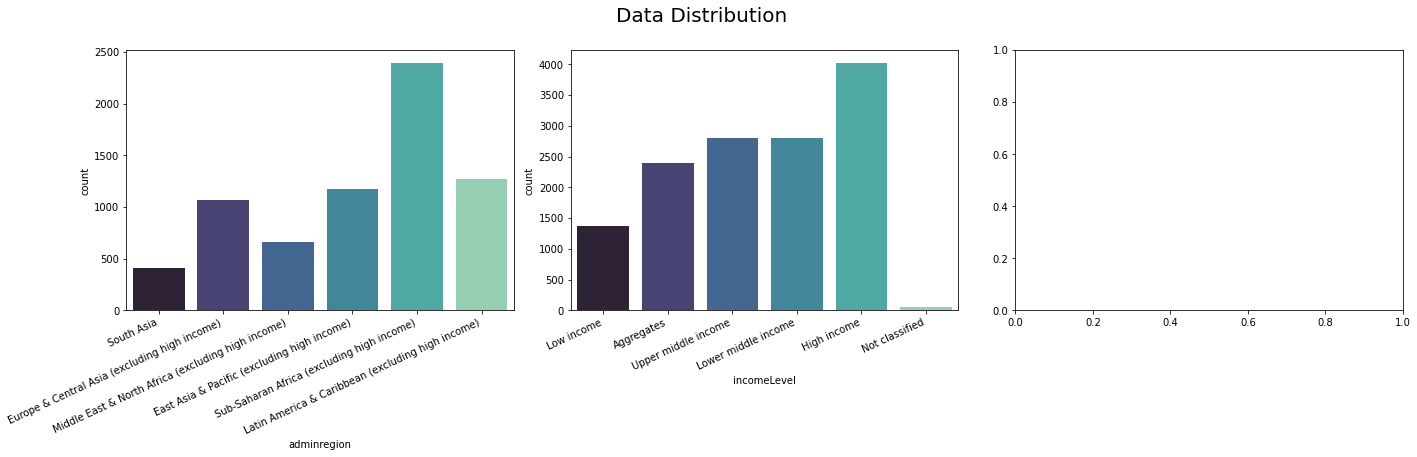

In [9]:
object_data = list(train_df.select_dtypes(include= 'object').columns)
type_data = [x for x in object_data if train_df[x].nunique() <= 15]
plot = sns.countplot
idx=0
fig , ax = plt.subplots(math.ceil(len(type_data)/3), 3, figsize=(20,len(type_data)*3))
if ax.ndim==1: 
  ax = [ax]
for row in ax:
  for column in row:
    plot(train_df[type_data[idx]], ax=column, palette="mako")
    xlabels = column.get_xticklabels()
    column.set_xticklabels(xlabels, rotation=25, ha='right')
    idx+=1
    if idx >= len(type_data): break

plt.tight_layout()
fig.subplots_adjust(top=0.95)
plt.suptitle("Data Distribution", fontsize=20, y=1.05)

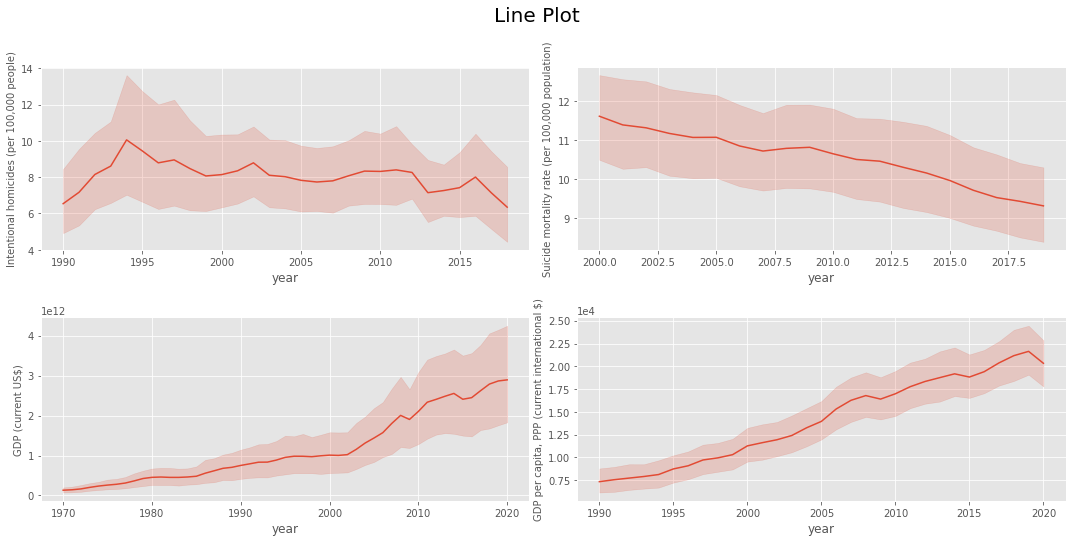

In [10]:
time = 'year' 
col = ['Intentional homicides (per 100,000 people)',
       'Suicide mortality rate (per 100,000 population)', 'GDP (current US$)',
       'GDP per capita, PPP (current international $)']

plt.style.use('ggplot')
fig , ax = plt.subplots(math.ceil(len(col)/2), 2, figsize=(15,len(col)*1.8))
idx=0
for row in ax:
  for column in row:
    sns.lineplot(train_df[time], train_df[col[idx]], ax=column, palette='g')
    plt.ticklabel_format(axis='y', style='sci', scilimits=(4,4))
    column.set_ylabel(column.get_ylabel(), fontsize=10)
    idx+=1
    if idx >= len(col): break
plt.suptitle('Line Plot', y=1.04, fontsize=20)
plt.tight_layout()

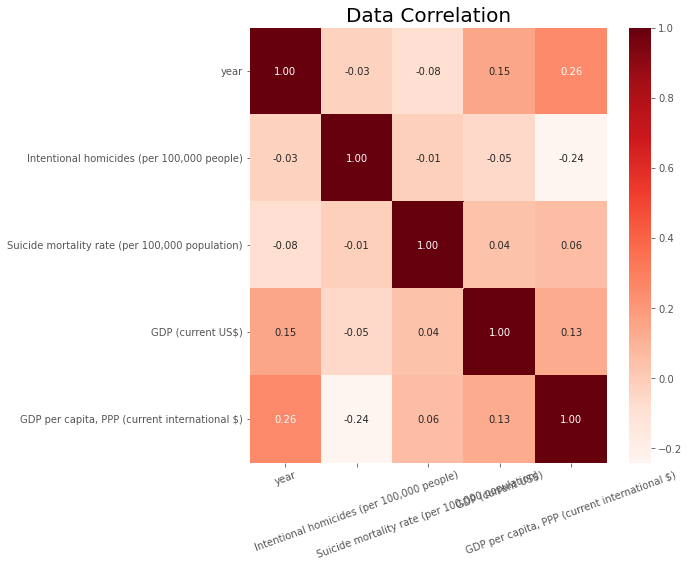

In [11]:
num_data = (train_df.select_dtypes(include= 'number'))
plt.figure(figsize=(8,8))
sns.heatmap(num_data.corr(),cmap=plt.cm.Reds,annot=True, fmt='.2f')
plt.title('Data Correlation',fontsize=20)
plt.xticks(rotation=20)
plt.show()

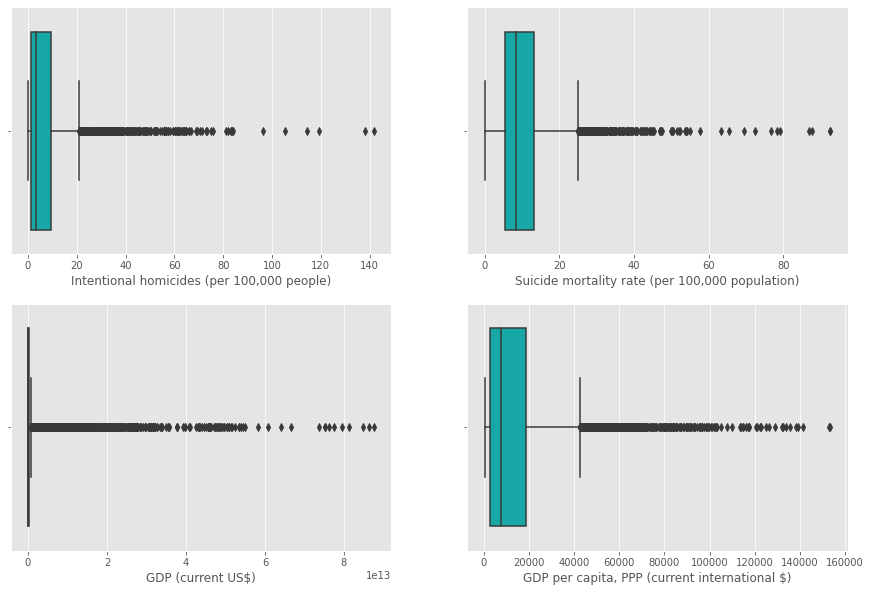

In [12]:
column = ['Intentional homicides (per 100,000 people)',
       'Suicide mortality rate (per 100,000 population)', 'GDP (current US$)',
       'GDP per capita, PPP (current international $)']
fig, ax = plt.subplots(2,2, figsize=(15,10))
idx=0
for i in ax:
  for j in i:
      sns.boxplot(train_df[column[idx]], ax=j, color='c')
      idx+=1